In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

First we will explore the random generator in the C library and how it is rather poor.

In [282]:
rand = np.loadtxt('rand_points.txt')
x = rand[:,0]
y = rand[:,1]
z = rand[:,2]

Looking at the plot for the full x, y and z range can see around the edges that there are some planes forming but it is difficult to see due to the large density of points. 

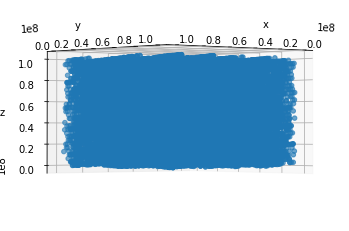

In [283]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, '.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(-1, 50)

Zooming in further we can see the distinct planes formed by the supposedly random points.

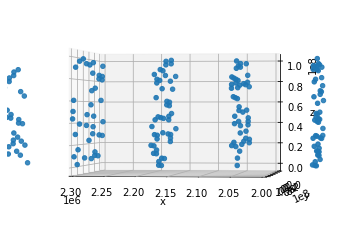

In [155]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, '.')
ax.set_xlim(0.2e7,0.23e7)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(0, 97)

I looked at a few different angles and zoomed in to see how the points all lie on different planes, which are parallel to eachother.

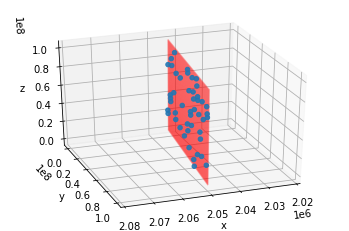

In [191]:
line_x = np.linspace(2.044e6,2.05e6,100)
line_y = (1.666e4*line_x) - (1.666e4* 2.044e6)
line_z = np.linspace(0,1e8,100)


fig = plt.figure()
ax = plt.axes(projection='3d')
for i in line_z:
    ax.plot3D(line_x,line_y,i, color='r',alpha = 0.3)

ax.scatter3D(x, y, z, '.')
ax.set_xlim(0.202e7,0.208e7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 70)

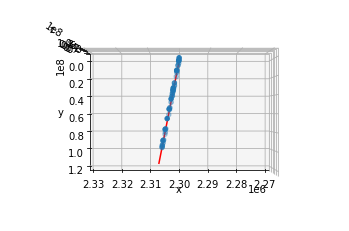

In [27]:
line_x = np.linspace(2.30e6,2.307e6,100)
line_y = (1.666e4*line_x) - (1.666e4* 2.3e6)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, '.')
ax.plot3D(line_x,line_y,0, color='r')
ax.set_xlim(0.227e7,0.233e7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(90, 90)

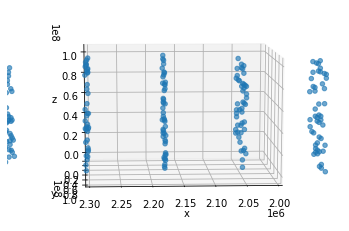

In [41]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, '.')
ax.set_xlim(0.2e7,0.23e7)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(10, 87)

## Testing the python random number generator 

In [13]:
n = 90000

test_python2 = np.zeros(n)
for i in range(n):
    test_python2[i] = np.random.randint(100000000)
    
test_python = test_python2.reshape((3,30000))
x_python = test_python[0,:]
y_python = test_python[1,:]
z_python = test_python[2,:]

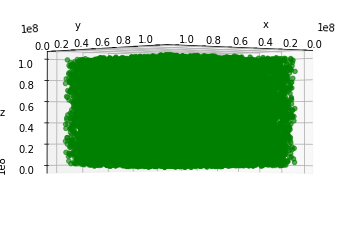

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_python, y_python, z_python, '.',color='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(-1, 50)

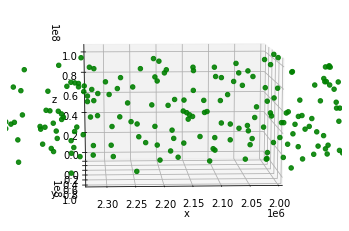

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_python, y_python, z_python, '.',color='g')
ax.set_xlim(0.2e7,0.233e7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 87)

Can see in the two above figures that the planes we saw in the C library generator are not present, even when zooming in and re-orienting the graph. I am now going to test out the library on my own computer by re-runnign Jon's code and generating another text files with the random numbers.

In [273]:
#python routine to help show how broken the C 
#standard library random number generator is.
#generate a bunch of random triples.  If plotted
#correctly, it becomes obvious they aren't 
#anywhere close to random.

import numpy as np
import ctypes
import numba as nb
import time
from matplotlib import pyplot as plt

mylib=ctypes.cdll.LoadLibrary("libc.dylib")
rand=mylib.rand
rand.argtypes=[]
rand.restype=ctypes.c_int


@nb.njit
def get_rands_nb(vals):
    n=len(vals)
    for i in range(n):
        vals[i]=rand()
    return vals

def get_rands(n):
    vec=np.empty(n,dtype='int32')
    get_rands_nb(vec)
    return vec


n=300000000
vec=get_rands(n*3)
#vv=vec&(2**16-1)

vv=np.reshape(vec,[n,3])
vmax=np.max(vv,axis=1)

maxval=1e8
vv2=vv[vmax<maxval,:]

f=open('rand_points_my_machine.txt','w')
for i in range(vv2.shape[0]):
    myline=repr(vv2[i,0])+' '+repr(vv2[i,1])+' '+ repr(vv2[i,2])+'\n'
    f.write(myline)
f.close()

In [279]:
rand = np.loadtxt('rand_points_my_machine.txt')
x_my = rand[:,0]
y_my = rand[:,1]
z_my = rand[:,2]

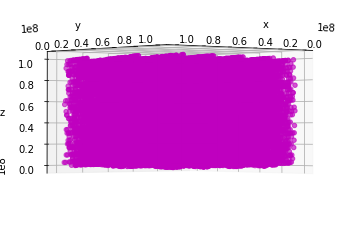

In [280]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_my, y_my, z_my, '.',color='m')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(-1, 50)

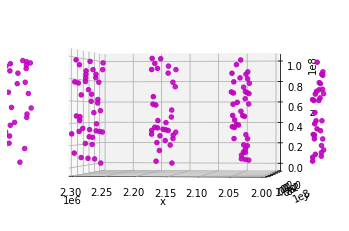

In [281]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_my, y_my, z_my, '.',color='m')
ax.set_xlim(0.2e7,0.23e7)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(0, 97)

We can also see for the C library on my computer that the planes are formed indicating that the random generator is not very good.

## Problem 2

### Exponential deviates from a Lorenztian 

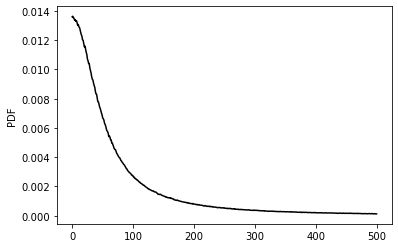

In [286]:
import numpy as np

# Invert the CDF of a lorentzian
# Since the range for the x values of a PDF for the Lorenztian are negative infinity to infinity, we have to convert 
# the input values to fit within the x range of arctan, so -pi/2 to pi/2
def lorentzians(n):
    q=np.pi*(np.random.rand(n)-0.5)
    return np.tan(q)

# the fraction to scale the y values for the Lorenztian
r = 1.01

#generate random numbers
n=10000000
alpha =1 
t=lorentzians(n)

#scale the random numbers to the distribution we are using to bound the exponential
y=1/(1+(t)**2)*np.random.rand(n) * r 

bins=np.linspace(0,10,501)
aa,bb=np.histogram(t,bins)
aa=aa/aa.sum()
plt.plot(aa, 'k')
plt.ylabel('PDF')
plt.show()


Above we have a quick look at the distribution for a Lorenztian created using a transformation. By taking the CDF which is the integral of the PDF, we can invert it, solving for the t values in terms of q (the CDF). Looking at the distribution we see as expected, half a Lorentzian due to the horizontal shift.

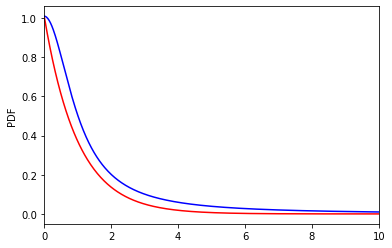

<ipython-input-287-ca605a1c0bc6>:15: RuntimeWarning: overflow encountered in exp
  accept=y<np.exp(-alpha*t)


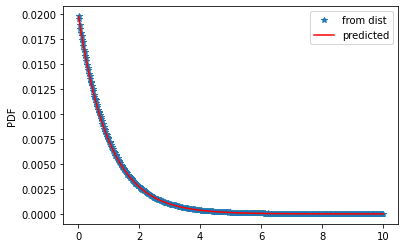

Lorenztian Method is 81.50140999999999% Efficient


In [287]:
cents=0.5*(bins[1:]+bins[:-1])
pred=1/(1+cents**2)
pred=pred/pred.sum()

myexp = np.exp(-alpha*cents)
myexp = myexp / myexp.max()
mylor=1/(1+(cents)**2) * r
plt.plot(cents,mylor ,'b')
plt.plot(cents,myexp,'r')
plt.xlim(0,10)
plt.ylabel('PDF')
plt.show()

# Do the rejection of the points that lie below the lorenztian and the exponential, throw away all other points
accept=y<np.exp(-alpha*t)
t_use=t[accept]

# Look at the results of the rejection method versus the real distribution
aa,bb=np.histogram(t_use,bins)
aa=aa/aa.sum()
pred=np.exp(-alpha*cents)
pred=pred/pred.sum()
plt.plot(cents,aa,'*', label='from dist')
plt.plot(cents,pred,'r',label='predicted')
plt.legend()
plt.ylabel('PDF')
plt.show()
print(f"Lorenztian Method is {len(t_use)/(len(t)) * 100}% Efficient")

After performing the rejection method we can see that we get a good approximation of the exponential distribution. The efficientcy is relatively high for this since the shifted Lorentzian sits pretty close to the exponential so not very many pointshave to get thrown out during the rejection. 

### Exponential deviates from a power law

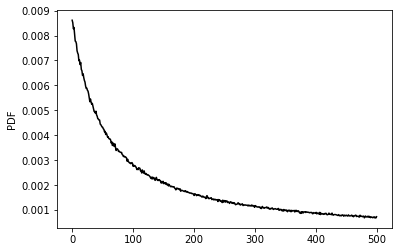

In [288]:
alpha = 1.1

# the fraction to scale the y values of the power law 
r = 1.0

#generate random numbers
n=10000000
q = np.random.rand(n)
t = q**(1/(1-alpha))
y = t**(-alpha)*np.random.rand(n) *r 

bins=np.linspace(1,10,501)
aa,bb=np.histogram(t,bins)
aa=aa/aa.sum()
plt.plot(aa,color='k')
plt.ylabel('PDF')
plt.show()



Similar to above, look at the PDF for the power law. 

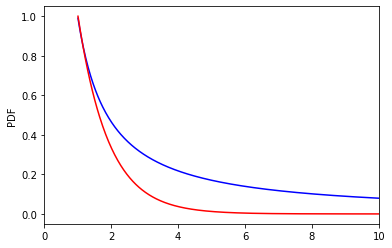

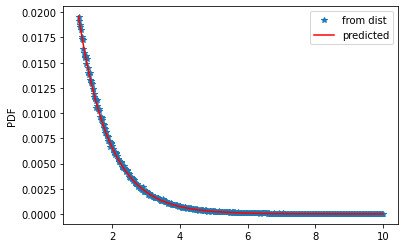

 Power law Method is 3.0287% Efficient


In [289]:
cents=0.5*(bins[1:]+bins[:-1])
pred=cents**(-alpha)
pred=pred/pred.sum()

myexp = np.exp(-alpha*cents)
myexp = myexp / myexp.max()
mypl = cents**(-alpha) *r
plt.plot(cents,mypl,'b')
plt.plot(cents,myexp,'r')
plt.xlim(0,10)
plt.ylabel('PDF')
plt.show()

#%# Do the rejection
accept=y<np.exp(-alpha*t)
t_use=t[accept]

# Look at the results of the rejection method versus the real distribution
aa,bb=np.histogram(t_use,bins)
aa=aa/aa.sum()
pred=np.exp(-alpha*cents)
pred=pred/pred.sum()
plt.plot(cents,aa,'*', label='from dist')
plt.plot(cents,pred,'r',label='predicted')
plt.legend()
plt.ylabel('PDF')
plt.show()
print(f" Power law Method is {len(t_use)/(len(t)) * 100}% Efficient")

As we can see above the lorenztian gives a much higher efficientcy as it is a closer fit to the exponential than the power law.

## Problem 3

Start with the constraint on u: 

$ 0 < u < \sqrt{PDF(\frac{v}{u}})$

The PDF of the exponential is: 

$ p(x) = e^{-\alpha x}$

So using the constraints on u we can figure out the bounds on v

$ 0 < u < \sqrt{e^{(-\alpha \frac{v}{u})}}$

$ 0 < u^2 < e^{-\alpha \frac{v}{u}} $

Setting $\alpha$ to 1 we get: 

$ -\infty < 2 ln(u) < - \frac{v}{u} $

$ \infty > -2 u ln(u) > v $

$ \infty > \frac{1}{v} > - \frac{1}{2ulnu} $

$ 0 < v < -2 u ln(u) $ 

To maximize the upper bound on v we can take the derivative: 

$\frac{d}{du}( -2 u ln(u) ) = 0 $

$ u = \frac{1}{e} $

The optimized bounds on v are then: 

$ 0 < v < \frac{2}{e} $


Method is 33.9462% Efficient


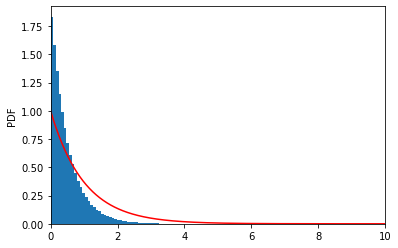

In [290]:
N=1000000
alpha = 1

# Generate the random numbers
u=np.random.uniform(low=0,high=1,size=N)

# Maximized v bounds h
vmax = 2/ np.e
v=np.random.uniform(low=0,high=vmax,size=N)

# Do the rejection Step
keep = u < alpha*np.exp(-alpha*(v/u)) 
rand_lorenz = v[keep]/u[keep]


plt.figure()
plt.hist(rand_lorenz[np.abs(rand_lorenz)<100],bins=100,density=True)
xs = np.linspace(0,10,1000)
pred=alpha*np.exp(-alpha*xs) 
plt.plot(xs,pred,color='r')
plt.xlim(min(xs),max(xs))
plt.ylabel('PDF')
print(f"Method is {len(rand_lorenz)/(len(u)) * 100}% Efficient")